In [1]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
data_path = kagglehub.competition_download('playground-series-s5e7')

print('Data source import complete.')

100%|██████████| 191k/191k [00:00<00:00, 553kB/s]

Extracting files...
Data source import complete.


In [3]:
print(data_path)

/root/.cache/kagglehub/competitions/playground-series-s5e7


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_data = pd.read_csv(os.path.join(data_path, 'test.csv'))

Original dataset

In [8]:
# df_orig = pd.read_csv('/content/drive/MyDrive/code/kaggle/S5E7_introvert_extrovert/personality_datasert.csv')

In [9]:
# df_orig.head()

In [10]:
# data = data.drop(columns=['id'])

# common_cols = data.columns.intersection(df_orig.columns)

# train_aligned = data[common_cols]
# df_orig_aligned = df_orig[common_cols]

# data = pd.concat([train_aligned, df_orig_aligned], axis=0).reset_index(drop=True)

# EDA

In [11]:
data.shape

(18524, 9)

In [12]:
data.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [13]:
data.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [15]:
missing_table = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage (%)': (data.isnull().mean() * 100).round(2)
})

print(missing_table.sort_values(by='Missing Values', ascending=False))

                           Missing Values  Percentage (%)
Stage_fear                           1893           10.22
Going_outside                        1466            7.91
Post_frequency                       1264            6.82
Time_spent_Alone                     1190            6.42
Social_event_attendance              1180            6.37
Drained_after_socializing            1149            6.20
Friends_circle_size                  1054            5.69
id                                      0            0.00
Personality                             0            0.00


In [16]:
data.nunique()

,0
id,18524
Time_spent_Alone,12
Stage_fear,2
Social_event_attendance,11
Going_outside,8
Drained_after_socializing,2
Friends_circle_size,16
Post_frequency,11
Personality,2


In [17]:
print(f"Duplicates before dropping: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Duplicates after dropping: {data.duplicated().sum()}")

Duplicates before dropping: 0
Duplicates after dropping: 0



Check dataset balance

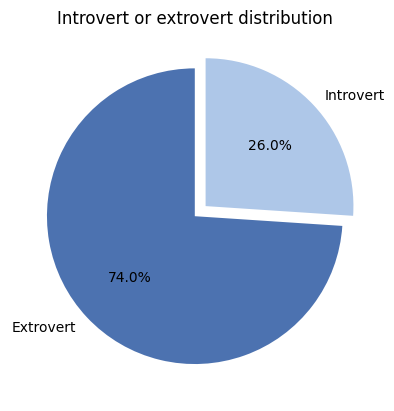

In [18]:
data['Personality'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Introvert or extrovert distribution')
plt.ylabel('')
plt.show()

# Data visualisations

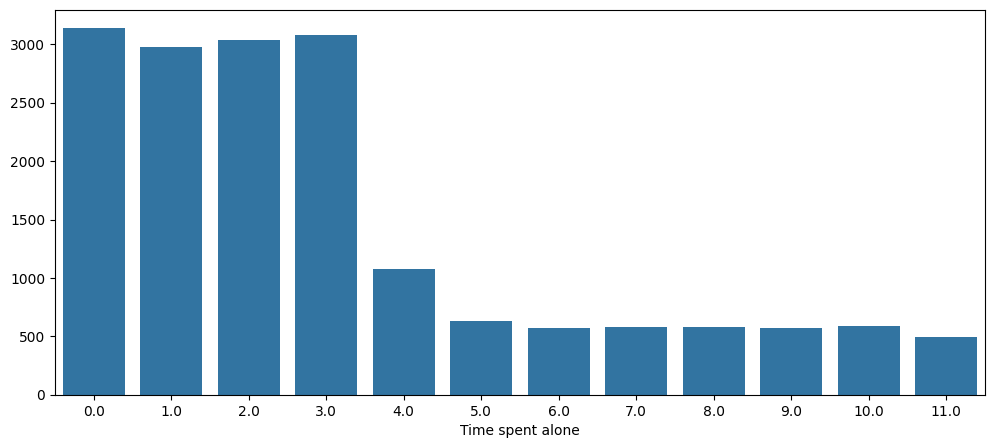

In [19]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x="Time_spent_Alone")
plt.xlabel('Time spent alone')
plt.ylabel('')
plt.show()

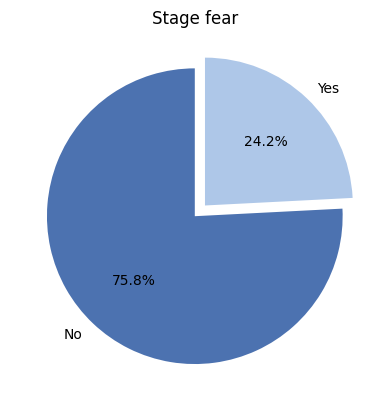

In [20]:
data['Stage_fear'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Stage fear')
plt.ylabel('')
plt.show()

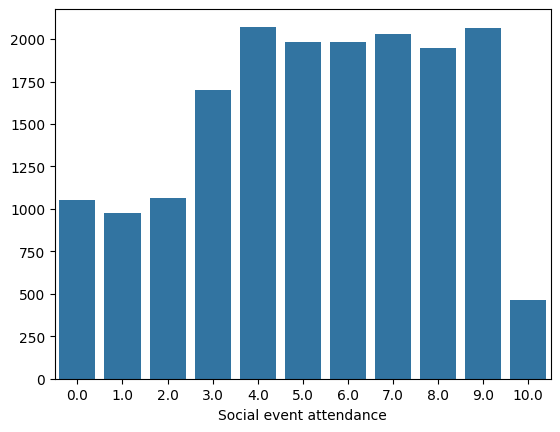

In [21]:
sns.countplot(data=data, x="Social_event_attendance")
plt.xlabel('Social event attendance')
plt.ylabel('')
plt.show()

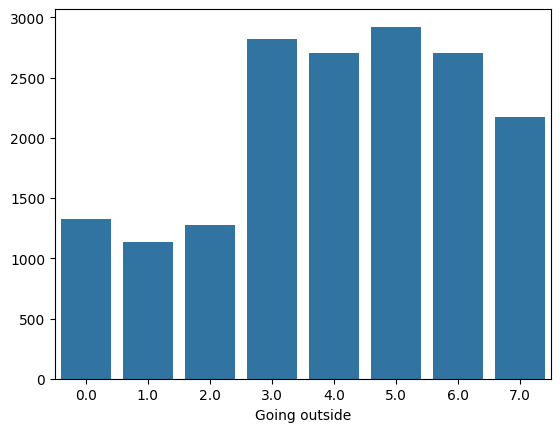

In [22]:
sns.countplot(data=data, x="Going_outside")
plt.xlabel('Going outside')
plt.ylabel('')
plt.show()

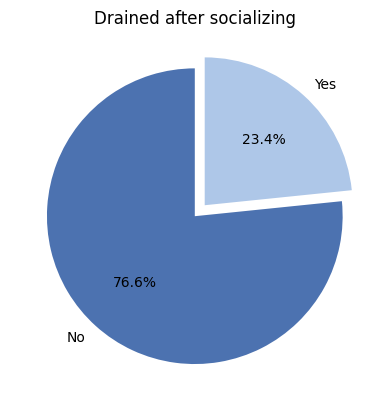

In [23]:
data['Drained_after_socializing'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Drained after socializing')
plt.ylabel('')
plt.show()

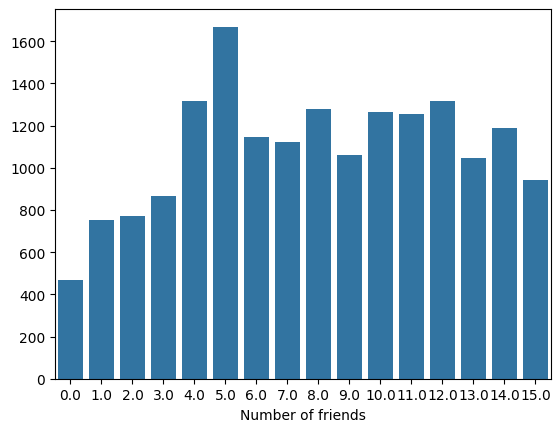

In [24]:
sns.countplot(data=data, x="Friends_circle_size")
plt.xlabel('Number of friends')
plt.ylabel('')
plt.show()

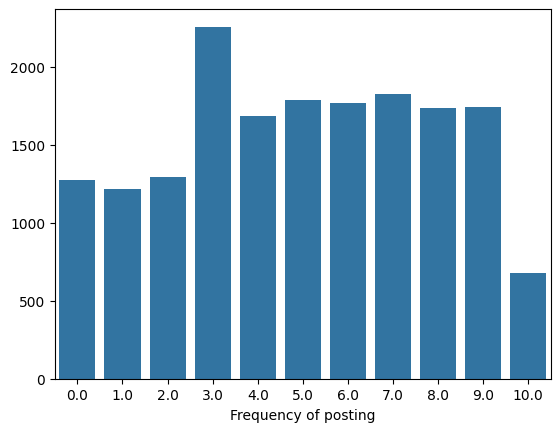

In [25]:
sns.countplot(data=data, x="Post_frequency")
plt.xlabel('Frequency of posting')
plt.ylabel('')
plt.show()

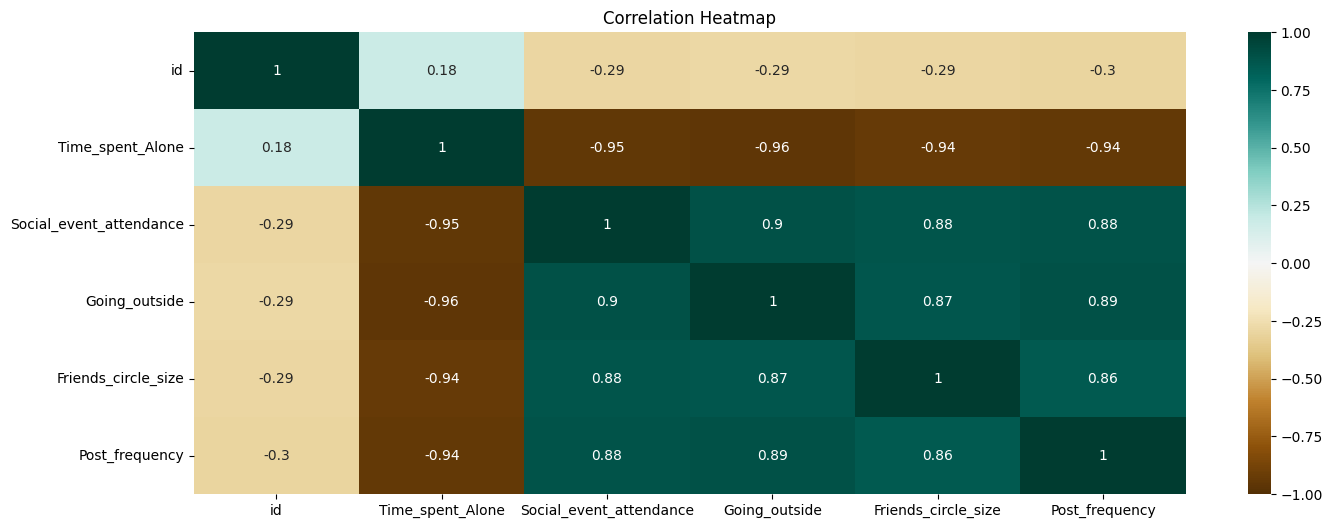

In [26]:
plt.figure(figsize=(16, 6))

data_corr = data.corr(numeric_only=True)

heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

plt.show()

# Data preprocessing

In [28]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.utils import shuffle

In [118]:
X = data.drop(['Personality','id'], axis=1)
y = data['Personality']

In [119]:
X, y = shuffle(X, y, random_state=42)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [120]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names_out_ = None

    def fit(self, X, y = None):
      return self

    def transform(self, X):
        X = X.copy()

        X['Social_score'] = X['Social_event_attendance'] + X['Going_outside'] + X['Friends_circle_size']
        X['Introvert_score'] = X['Time_spent_Alone'] - X['Social_score']
        X['Alone_to_friends_ratio'] = X['Time_spent_Alone'] / (X['Friends_circle_size'] + 1)
        X['Social_post_interaction'] = X['Post_frequency'] * X['Social_event_attendance']

        self.feature_names_out_ = X.columns.tolist()

        return X

    def get_feature_names_out(self, input_features=None):
        return self.feature_names_out_

In [121]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean', add_indicator=True)),
    ('scaler', StandardScaler())
])

In [122]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),
    ('encoder', OrdinalEncoder())
])

In [123]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, make_column_selector(dtype_include=['int64', 'float64'])),
    ('cat', categorical_pipeline, make_column_selector(dtype_include=['object']))
])

In [124]:
le = LabelEncoder()
y = le.fit_transform(y)

# Model building

In [137]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
import shap
shap.initjs()

In [126]:
counter = Counter(y)
scale_pos_weight = counter[0] / counter[1]

In [127]:
best_params =  {'max_depth': 5,
                  'learning_rate': 0.016936843011325364,
                  'n_estimators': 958,
                  'subsample': 0.5385682613272109,
                  'colsample_bytree': 0.5185754497137016,
                  'min_child_weight': 1,
                  'gamma': 0.1832798205532591,
                  'n_jobs': -1,
                  "objective" : "binary:logistic",
                  "eval_metric" : "logloss"
                  }

In [128]:
lgbm_params = {'colsample_bytree': 0.7,
               'learning_rate': 0.05,
               'n_estimators': 300,
               'num_leaves': 20,
               'subsample': 0.7,
               'reg_alpha': 0.1,
               'reg_lambda': 0.1,
               }

In [129]:
# def objective(trial):
#     params = {
#         'max_depth': trial.suggest_int('max_depth', 3, 18),
#         'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
#         'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#     }


#     xgb_pipeline = Pipeline([
#     ('features', FeatureEngineer()),
#     ('preprocessing', preprocessor),
#     ('classifier', XGBClassifier(**params,
#                                  tree_method = 'hist',
#                                  device =  'cuda',
#                                  scale_pos_weight = scale_pos_weight))
#     ])


#     score = cross_val_score(xgb_pipeline, X, y, cv=cv,  scoring='accuracy').mean()
#     return score

In [130]:
# ! pip install optuna

In [131]:
# import optuna

# study = optuna.create_study(study_name="example_xgboost_study", direction='maximize')
# study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)

# best_params = study.best_params
# print(f"\nBest parameters: {best_params}")

In [132]:
pipeline = Pipeline([
    ('features', FeatureEngineer()),
    ('preprocessing', preprocessor)
    ])

In [133]:
X = pipeline.fit_transform(X)
X_test = pipeline.transform(test_data)

In [138]:
xgb_model = XGBClassifier(**best_params,
                          tree_method = 'hist',
                          device =  'cuda',
                          scale_pos_weight = scale_pos_weight)

lgbm_model = LGBMClassifier(**lgbm_params,
                            scale_pos_weight = scale_pos_weight)

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                          solver='adam', max_iter=300, random_state=42)

In [139]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [141]:
xgb_oof = np.zeros(len(X))
mlp_oof = np.zeros(len(X))
xgb_test_preds = np.zeros(len(X_test))
mlp_test_preds = np.zeros(len(X_test))

xgb_acc = []
mlp_acc = []

for train_index, val_index in cv.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Train XGB
    xgb_model.fit(X_train, y_train)
    xgb_oof[val_index] = xgb_model.predict_proba(X_val)[:, 1]
    xgb_test_preds += xgb_model.predict_proba(X_test)[:, 1] / 10
    xgb_acc.append(accuracy_score(y_val, (xgb_oof[val_index] > 0.5).astype(int)))

    # Train LGB
    mlp_model.fit(X_train, y_train)
    mlp_oof[val_index] = mlp_model.predict_proba(X_val)[:, 1]
    mlp_test_preds += mlp_model.predict_proba(X_test)[:, 1] / cv.get_n_splits()
    mlp_acc.append(accuracy_score(y_val, (mlp_oof[val_index] > 0.5).astype(int)))

In [156]:
print(f"XGB mean accuracy: {np.mean(xgb_acc):.4f}")
print(f"MLP mean accuracy: {np.mean(mlp_acc):.4f}")

XGB mean accuracy: 0.9686
MLP mean accuracy: 0.9679


In [150]:
from sklearn.ensemble import GradientBoostingClassifier

stacked_oof = np.vstack([xgb_oof, mlp_oof]).T
stacked_test = np.vstack([xgb_test_preds, mlp_test_preds]).T

meta_model = GradientBoostingClassifier()
meta_model.fit(stacked_oof, y)
final_preds = meta_model.predict_proba(stacked_test)[:, 1]

# Submition

In [151]:
# final_preds = (xgb_test_preds + lgb_test_preds) / 2
y_pred_test = (final_preds >= 0.5).astype(int)

In [152]:
mapping = {0: "Extrovert", 1: "Introvert"}

y_test_labels = pd.Series(y_pred_test).map(mapping)

In [153]:
submission = pd.DataFrame({
    'id': test_data["id"],
    'Personality': y_test_labels
})

In [154]:
submission

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [155]:
submission.to_csv('submission.csv', index=False)